# Biodiversity Analysis

This is a simple practice project using data from Codecademy.

## Step 1: Import required dependencies, load data, and examine a few observations and the data types

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

species_info = pd.read_csv('species_info.csv')
species_obs = pd.read_csv('observations.csv')

#print(species_info.info())
#print(species_obs.info())

species_obs.dtypes

### Information about the dataset

* **species_info** has four columns: Category (i.e., species types), Scientific Name, Common Names, and Conservation Status
  * All variables are categorical string objects
  * Category has 7 unique values
  * Conservation Status has 4 unique values
* **species_obs** has three columns: Scientific Name, Park Name, and Number of Observations
  * The first two variables are categorical string objects and the third is an integer value
  * Park name has 4 unique values

In [ ]:
columns = species_info.columns
for column in columns:
    print(column, species_info[column].unique(), species_info[column].nunique())

In [ ]:
obs_columns = species_obs.columns
for column in obs_columns:
    print(column, species_obs[column].unique(), species_obs[column].nunique())

### Then clean up some variables and create a third dataset by merging the original two

In [ ]:
# Explicitly make conservation status a categorical variable
species_info['conservation_status'] = pd.Categorical(species_info['conservation_status'],["In Recovery", "Species of Concern", "Threatened", "Endangered"], ordered=True)

In [ ]:
# Merge datasets
species = pd.merge(species_info, species_obs, on='scientific_name')
species.head()

## Summary Statistics

In [52]:
species_props = species_info['category'].value_counts(normalize = True)
cons_status_props = species_info['conservation_status'].value_counts(normalize = True)
park_props = species_obs['park_name'].value_counts(normalize = True)
print("-------------Species-------------------")
print(species_props*100)
print("-------------Conservation Status-------------------")
print(cons_status_props*100)
print("-------------Parks-------------------")
print(park_props*100)

-------------Species-------------------
Vascular Plant       76.751374
Bird                  8.945742
Nonvascular Plant     5.717720
Mammal                3.674451
Fish                  2.180632
Amphibian             1.373626
Reptile               1.356456
Name: category, dtype: float64
-------------Conservation Status-------------------
Species of Concern    84.293194
Endangered             8.376963
Threatened             5.235602
In Recovery            2.094241
Name: conservation_status, dtype: float64
-------------Parks-------------------
Great Smoky Mountains National Park    25.0
Yosemite National Park                 25.0
Bryce National Park                    25.0
Yellowstone National Park              25.0
Name: park_name, dtype: float64


In [66]:
species_obs['observations'].groupby(species_obs['park_name']).sum()/species_obs['observations'].sum()*100

park_name
Bryce National Park                    17.377688
Great Smoky Mountains National Park    13.027270
Yellowstone National Park              43.549794
Yosemite National Park                 26.045248
Name: observations, dtype: float64

In [53]:
species_obs['observations'].describe()

count    23296.000000
mean       142.287904
std         69.890532
min          9.000000
25%         86.000000
50%        124.000000
75%        195.000000
max        321.000000
Name: observations, dtype: float64

In [68]:
pd.crosstab(species['category'], species['conservation_status'])

conservation_status,In Recovery,Species of Concern,Threatened,Endangered
category,,,,
Amphibian,0,16,8,4
Bird,12,320,0,16
Fish,0,16,20,12
Mammal,12,168,8,44
Nonvascular Plant,0,20,0,0
Reptile,0,20,0,0
Vascular Plant,0,172,8,4


## Visualize

<AxesSubplot:xlabel='conservation_status'>

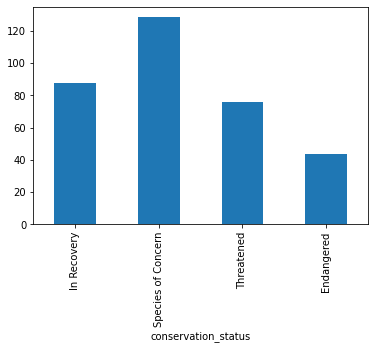

In [60]:
species['observations'].groupby(species['conservation_status']).mean().plot.bar()

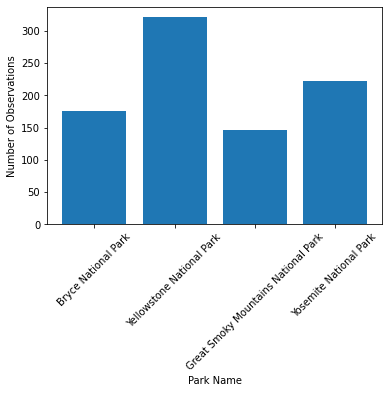

In [63]:
plt.bar(species['park_name'], species['observations'])
plt.xticks(rotation=45)
plt.xlabel('Park Name')
plt.ylabel('Number of Observations')
plt.show()

In [ ]:
cat_means = species['observations'].groupby(species['category']).mean()
plt.bar(cat_means.index, cat_means)
plt.title("Number of Sightings by Species Type")
plt.xlabel("Species")
plt.ylabel("Number of Observations")
plt.xticks(rotation=45)
plt.show()

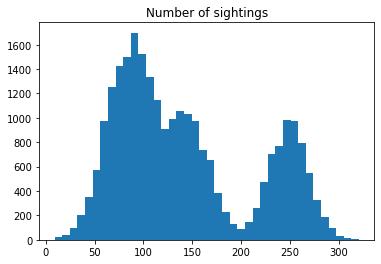

In [58]:
plt.hist(species['observations'], bins=40)
plt.title("Number of sightings")
plt.show()